In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
    data: DataFrame или массив, содержащий данные для построения графика;
    x: название переменной или вектор данных для оси X;
    y: название переменной или вектор данных для оси Y;
    hue: название переменной или вектор данных, определяющий расцветку столбцов;
    order: упорядоченный список уникальных значений для оси X (если нужно задать определённый порядок столбцов);
    hue_order: упорядоченный список уникальных значений для переменной hue;
    estimator: функция для вычисления значений по категориям. По умолчанию np.mean. Можно использовать такие функции, 
            как np.sum, np.median и т.д.;
    errorbar: функция или параметр для вычисления ошибки. Поддерживает значения sd (стандартное отклонение), 
            ci (интервал доверия), pi (предсказательный интервал) и пользовательские функции;
    color: цвет столбцов;
    palette: палитра цветов для переменной hue;
    saturation: степень насыщенности цвета столбцов. Значение по умолчанию = 0.75;
    width: задает относительную ширину столбцов. Значение по умолчанию = 0.8;
    dodge: логическое значение, определяющее, будут ли столбцы разных категорий hue расположены рядом (если True) 
            или наложены друг на друга (если False).

In [2]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
    'species' - вид пингвина (Adelie, Chinstrap, Gentoo);
    'island' - остров, где были собраны данные (Biscoe, Dream, Torgersen);
    'bill_length_mm' - длина клюва в миллиметрах;
    'bill_depth_mm' - глубина клюва в миллиметрах;
    'flipper_length_mm' - длина ласт в миллиметрах;
    'body_mass_g' - масса тела в граммах;
    'sex' - пол пингвина (Male, Female).

In [4]:
sns.set_style('whitegrid')

''

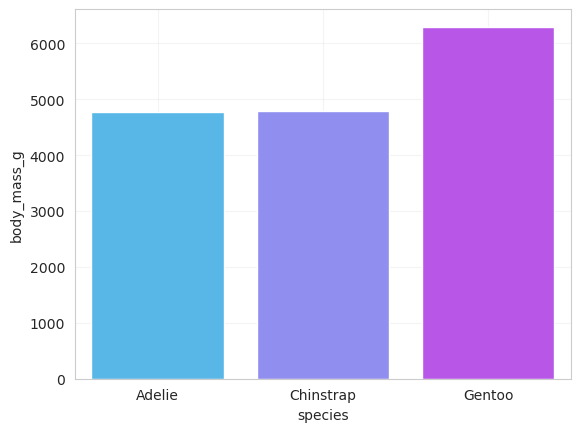

In [16]:
sns.barplot(penguins, 
            x = 'species', 
            y = 'body_mass_g', 
            hue='species',
            palette = 'cool',
           width = 0.8,
           estimator = 'max',     # default - 'mean'
            errorbar = None
           )
plt.grid(alpha = 0.2)
;
    # errorbar='ci': по умолчанию, barplot отображает 95%-й доверительный интервал;
    # errorbar='sd': отображает стандартное отклонение значений;
    # errorbar='se': отображает стандартную ошибку значений;
    # errorbar=None: отключает отображение ошибок.

''

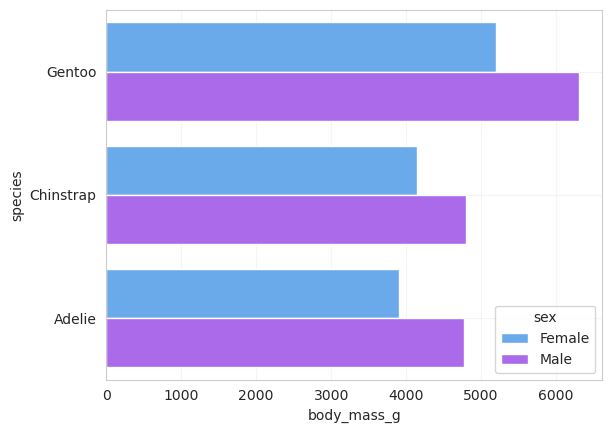

In [20]:
sns.barplot(penguins, 
            y = 'species', 
            x = 'body_mass_g', 
            palette = 'cool',
           width = 0.8,
           estimator = 'max',     # default - 'mean'
            errorbar = None,
            hue='sex',
            hue_order = ['Female', 'Male'],
            order=['Gentoo', 'Chinstrap', 'Adelie']
           )
plt.grid(alpha = 0.2)
;
    # errorbar='ci': по умолчанию, barplot отображает 95%-й доверительный интервал;
    # errorbar='sd': отображает стандартное отклонение значений;
    # errorbar='se': отображает стандартную ошибку значений;
    # errorbar=None: отключает отображение ошибок.

''

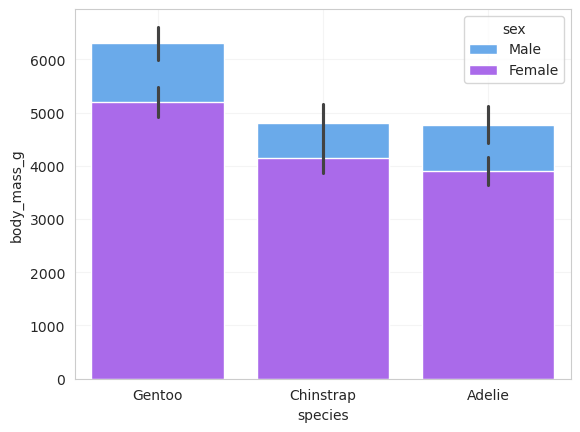

In [25]:
sns.barplot(penguins, 
            x = 'species', 
            y = 'body_mass_g', 
            palette = 'cool',
           width = 0.8,
           estimator = 'max',     # default - 'mean'
            errorbar = 'sd',
            hue='sex',
            order=['Gentoo', 'Chinstrap', 'Adelie'],
            dodge = False,
           )
plt.grid(alpha = 0.2)
;
    # errorbar='ci': по умолчанию, barplot отображает 95%-й доверительный интервал;
    # errorbar='sd': отображает стандартное отклонение значений;
    # errorbar='se': отображает стандартную ошибку значений;
    # errorbar=None: отключает отображение ошибок.

In [12]:
penguins.groupby(by = 'species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


''

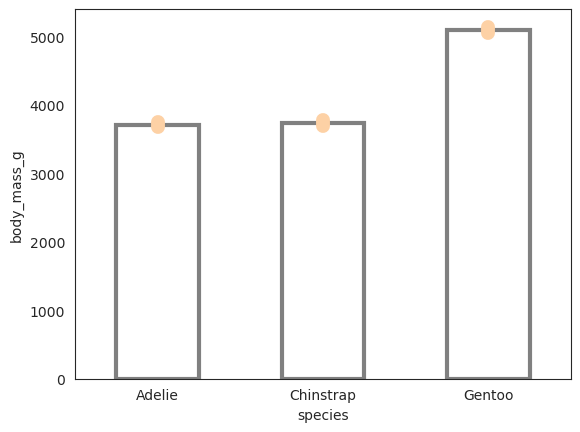

In [34]:
sns.set_style('white')
sns.barplot(data=penguins, x='species', y='body_mass_g',
            width=0.5,
            color='lightgreen',
            errorbar='se',
            err_kws = {'color': '#fdd1a5', 'linewidth': 10},
            edgecolor='grey',
            linewidth=3,
           fill = False)

;